In [1]:
import numpy as np
from itertools import combinations
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('../scores')
from interactions import *
from pdpbox import pdp
import pandas as pd
import os
from scipy.stats import random_correlation
from copy import deepcopy
from os.path import join as oj
from tqdm import tqdm
import pickle as pkl
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["font.family"] = "Times New Roman"
font = {'family' : 'normal',
        'size'   : 13}
matplotlib.rc('font', **font)
size_small = 10

In [2]:
hr = np.loadtxt('bike_heatmap_results/hr_curve.csv')
holiday = np.loadtxt('bike_heatmap_results/holiday_curve.csv')
hum = np.loadtxt('bike_heatmap_results/hum_curve.csv')
temp = np.loadtxt('bike_heatmap_results/temp_curve.csv')
windspeed = np.loadtxt('bike_heatmap_results/windspeed_curve.csv')
mnth = np.loadtxt('bike_heatmap_results/mnth_curve.csv')

holiday_vs_hr = np.loadtxt('bike_heatmap_results/hr_holiday_grid.csv', delimiter=',')
temp_vs_windspeed = np.loadtxt('bike_heatmap_results/temp_windspeed_grid.csv', delimiter=',')

temp_vs_holiday = np.loadtxt('bike_heatmap_results/temp_holiday_grid.csv', delimiter=',')
mnth_vs_hum = np.loadtxt('bike_heatmap_results/mnth_hum_grid.csv', delimiter=',')

In [19]:
vmean = 188.65
vmax = max(np.max(holiday_vs_hr), np.max(temp_vs_windspeed))
vmin = min(np.min(holiday_vs_hr), np.min(temp_vs_windspeed))

print(vmean, vmax, vmin)
max_diff = max(vmax - vmean, vmean - vmin)
vmax = vmean + max_diff
vmin = vmean - max_diff
print(vmean, vmax, vmin)

188.65 303.66077461882924 13.184761904761906
188.65 364.1152380952381 13.1847619047619


**holiday vs hours**

In [ ]:
plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(20, 20)
topheight = 4
rightwidth = 4

# top plot
ax1 = plt.subplot(gs[:topheight, :-rightwidth])
plt.xticks([])
plt.plot(hr)
plt.ylabel('DAC(Hour)', fontsize=size_small)


ax2 = plt.subplot(gs[topheight:, :-rightwidth])
cmap = sns.color_palette("RdBu", n_colors=1000)
im = sns.heatmap(holiday_vs_hr, vmin=vmin, vmax=vmax, cmap=cmap, cbar=False)
ax2.set_yticklabels(["No", "Half", "Yes"])
plt.xticks(np.arange(0, 24, 2) + 0.5, labels=np.arange(0, 24, 2))
plt.xlabel('Hour')
plt.ylabel('Holiday')


ax3 = plt.subplot(gs[topheight:, -rightwidth:])
plt.yticks([])
plt.plot(holiday, range(len(holiday))[::-1])
plt.xlabel('DAC(Holiday)', fontsize=size_small)

plt.subplot(gs[1, -1])
plt.title('A', fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.savefig('hr_holiday.pdf')

**temp vs windspeed**

In [ ]:
plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(20, 20)
topheight = 4
rightwidth = 4

# top plot
ax1 = plt.subplot(gs[:topheight, :-rightwidth])
plt.xticks([])
plt.plot(temp)
plt.ylabel('DAC(Temp)', fontsize=size_small)


ax2 = plt.subplot(gs[topheight:, :-rightwidth])
cmap = sns.color_palette("RdBu", n_colors=1000)
im = sns.heatmap(temp_vs_windspeed, vmin=vmin, vmax=vmax, cmap=cmap, cbar=False)
# ax2.set_yticklabels(["No", "Half", "Yes"])
plt.xticks(np.arange(0, 10, 2), labels=['0', '0.2', '0.4', '0.6', '0.8', '1'])
plt.yticks(np.arange(0, 11, 2), labels=['0', '0.2', '0.4', '0.6', '0.8', '1'])
plt.xlabel('Temp')
plt.ylabel('Windspeed')


ax3 = plt.subplot(gs[topheight:, -rightwidth:])
plt.yticks([])
plt.plot(windspeed, range(len(temp))[::-1])
plt.xlabel('DAC(Windspeed)', fontsize=size_small)

plt.subplot(gs[1, -1])
plt.title('B', fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.savefig('temp_windspeed.pdf')

**generate color bar**

In [ ]:
fig, axes = plt.subplots(2, 1)
colors = sns.color_palette("RdBu", n_colors=1000)# [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)
ax = axes[0]
im_cbar = ax.imshow(temp_vs_windspeed, vmin=vmin, vmax=vmax, interpolation='nearest', origin='lower', cmap=cm)
# fig.colorbar(im_cbar, ax=ax)

plt.figure(figsize=(0.5, 4), dpi=300)
ax = plt.gca()
ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1000%")

cb = plt.colorbar(im_cbar, cax=cax, pad=0)
cb.ax.tick_params(labelsize=8) 
cb.outline.set_visible(False)
# plt.tight_layout()
# plt.savefig('superheat_cbar.png')

# appendix figs
note: to get the cbar right, have to uncomment line, run it, then re-comment

In [25]:
vmean = 188.65
vmax = max(np.max(temp_vs_holiday), np.max(mnth_vs_hum))
vmin = min(np.min(temp_vs_holiday), np.min(mnth_vs_hum))

print(vmean, vmax, vmin)
max_diff = max(vmax - vmean, vmean - vmin)
vmax = vmean + max_diff
vmin = vmean - max_diff
print(vmean, vmax, vmin)

188.65 244.1515729536209 153.78301768651647
188.65 244.1515729536209 133.1484270463791


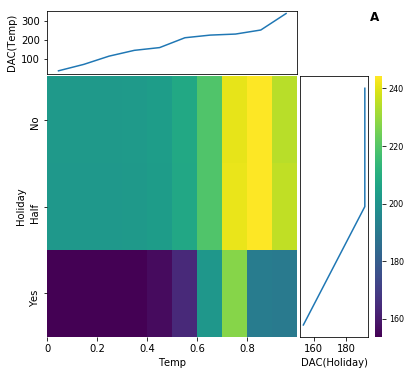

In [52]:
plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(20, 20)
topheight = 4
rightwidth = 5

# top plot
ax1 = plt.subplot(gs[:topheight, :-rightwidth])
plt.xticks([])
plt.plot(temp)
plt.ylabel('DAC(Temp)', fontsize=size_small)


ax2 = plt.subplot(gs[topheight:, :-rightwidth])
cmap = sns.color_palette("viridis", n_colors=1000)

cm = LinearSegmentedColormap.from_list('x', cmap)
# im_c = ax2.imshow(temp_vs_holiday, cmap=cm)


im = sns.heatmap(temp_vs_holiday.T, cmap=cmap, cbar=False) #vmin=0, vmax=300, )
ax2.set_yticklabels(["No", "Half", "Yes"])
plt.xticks(np.arange(0, 10, 2), labels=['0', '0.2', '0.4', '0.6', '0.8', '1'])
plt.xlabel('Temp')
plt.ylabel('Holiday')


ax3 = plt.subplot(gs[topheight:, -rightwidth:])
plt.yticks([])
plt.plot(holiday, range(len(holiday))[::-1])
plt.xlabel('DAC(Holiday)', fontsize=size_small)

plt.subplot(gs[1, -1])
plt.title('A', fontweight='bold')
plt.axis('off')

plt.tight_layout()

plt.subplot(gs[topheight:, -rightwidth:])
ax = plt.gca()
# ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)

cb = plt.colorbar(im_c, cax=cax)
cb.ax.tick_params(labelsize=8) 
cb.outline.set_visible(False)


plt.savefig('temp_holiday.pdf')

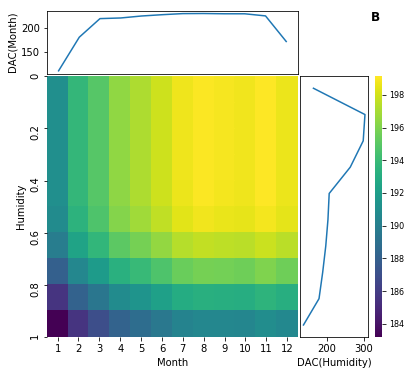

In [49]:
plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(20, 20)
topheight = 4
rightwidth = 5

# top plot
ax1 = plt.subplot(gs[:topheight, :-rightwidth])
plt.xticks([])
plt.plot(mnth)
plt.ylabel('DAC(Month)', fontsize=size_small)


ax2 = plt.subplot(gs[topheight:, :-rightwidth])

cmap = sns.color_palette("viridis", n_colors=1000)
cm = LinearSegmentedColormap.from_list('x', cmap)
# im_c = ax2.imshow(mnth_vs_hum, cmap=cm)

im = sns.heatmap(mnth_vs_hum, cmap=cmap, cbar=False) #vmin=vmin, vmax=vmax)
ax2.set_yticklabels(["No", "Half", "Yes"])
plt.xticks(np.arange(0, 12) + 0.5, labels=np.arange(1, 13, 1))
plt.yticks(np.arange(0, 11, 2), labels=['0', '0.2', '0.4', '0.6', '0.8', '1'])
plt.xlabel('Month')
plt.ylabel('Humidity')


ax3 = plt.subplot(gs[topheight:, -rightwidth:])
plt.yticks([])
plt.plot(hum, range(len(hum))[::-1])
plt.xlabel('DAC(Humidity)', fontsize=size_small)

plt.subplot(gs[1, -1])
plt.title('B', fontweight='bold')
plt.axis('off')
plt.ylim((0, 1))

plt.tight_layout()

plt.subplot(gs[topheight:, -rightwidth:])
ax = plt.gca()
# ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)

cb = plt.colorbar(im_c, cax=cax)
cb.ax.tick_params(labelsize=8) 
cb.outline.set_visible(False)

plt.savefig('mnth_humidity.pdf')